In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns


Preparación de los datos

    YellowTripData

In [2]:
def limpiar_Yellow_Trip_Data(Yellow_Trip_Data):
    #Seleccionar las columnas que se vana  utilizar
    Yellow_Trip_Data_limpio=Yellow_Trip_Data[['VendorID','tpep_pickup_datetime','tpep_dropoff_datetime','trip_distance','PULocationID','DOLocationID']]
    #Agregar transformaciones si hacen falta
    return Yellow_Trip_Data_limpio

In [3]:
Yellow_Trip_Data_df=pd.read_parquet('yellow_tripdata_2023-01.parquet')
Yellow_Trip_Data=limpiar_Yellow_Trip_Data(Yellow_Trip_Data_df)
print(Yellow_Trip_Data.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  trip_distance  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36           0.97   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27           1.10   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49           2.51   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25           1.90   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19           1.43   

   PULocationID  DOLocationID  
0           161           141  
1            43           237  
2            48           238  
3           138             7  
4           107            79  


    NYC Taxi Zones

In [4]:
def limpiar_NYC_TAXI_ZONES(NYC_TAXI_ZONES):
    NYC_TAXI_ZONES_limpio=NYC_TAXI_ZONES[['location_id','zone','borough','geometry']]
    NYC_TAXI_ZONES_limpio = NYC_TAXI_ZONES_limpio.to_crs(epsg=2263)

# Calculate centroids of the projected polygons
    NYC_TAXI_ZONES_limpio['centroid'] = NYC_TAXI_ZONES_limpio.centroid

    NYC_TAXI_ZONES_limpio['Centroid']=NYC_TAXI_ZONES['geometry'].centroid
    return NYC_TAXI_ZONES_limpio

In [5]:
NYC_TAXI_ZONES_df=gpd.read_file('Datasets/NYC Taxi Zones.geojson')
NYC_TAXI_ZONES=limpiar_NYC_TAXI_ZONES(NYC_TAXI_ZONES_df)
print(NYC_TAXI_ZONES.head())

  location_id                     zone        borough  \
0           1           Newark Airport            EWR   
1           2              Jamaica Bay         Queens   
2           3  Allerton/Pelham Gardens          Bronx   
3           4            Alphabet City      Manhattan   
4           5            Arden Heights  Staten Island   

                                            geometry  \
0  MULTIPOLYGON (((933100.918 192536.086, 933091....   
1  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2  MULTIPOLYGON (((1026308.77 256767.698, 1026495...   
3  MULTIPOLYGON (((992073.467 203714.076, 992068....   
4  MULTIPOLYGON (((935843.31 144283.336, 936046.5...   

                         centroid                    Centroid  
0    POINT (935996.821 191376.75)    POINT (-74.174 40.69183)  
1  POINT (1031085.719 164018.754)   POINT (-73.8313 40.61675)  
2  POINT (1026452.617 254265.479)  POINT (-73.84742 40.86447)  
3   POINT (990633.981 202959.782)  POINT (-73.97697 40.72375)  


/var/folders/0p/l9p40s5527102cq821lz6jlw0000gn/T/ipykernel_67373/733849802.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  NYC_TAXI_ZONES_limpio['Centroid']=NYC_TAXI_ZONES['geometry'].centroid


    Electric and alternative fuel stations

In [6]:
def limpiar_charging_stations(charging_stations):
    # Select relevant columns
    charging_stations_limpio = charging_stations[['Fuel Type Code', 'Station Name', 'Street Address', 'Intersection Directions', 'City', 'State', 'Latitude', 'Longitude']]
    
    # Filter for New York City and electric charging stations
    charging_stations_limpio = charging_stations_limpio[charging_stations_limpio['City'] == 'New York']
    charging_stations_limpio = charging_stations_limpio[charging_stations_limpio['Fuel Type Code'] == 'ELEC'].reset_index(drop=True)
    
    # Create GeoDataFrame
    charging_stations_limpio = gpd.GeoDataFrame(charging_stations_limpio, geometry=gpd.points_from_xy(charging_stations_limpio['Longitude'], charging_stations_limpio['Latitude']))
    
    # Set CRS to WGS84 (latitude and longitude)
    charging_stations_limpio['geometry'].set_crs(epsg=4326, inplace=True)
    charging_stations_limpio['geometry'] = charging_stations_limpio['geometry'].to_crs(epsg=2263)

    # Fill NaN values in 'Intersection Directions' with 'No Intersection'
    charging_stations_limpio['Intersection Directions'] = charging_stations_limpio['Intersection Directions'].fillna('No Intersection')
    charging_stations_limpio=charging_stations_limpio[['Station Name','Street Address','Intersection Directions','City','geometry']]
    
    return charging_stations_limpio


In [7]:
charging_stations_df=pd.read_csv('Datasets/Electric and Alternative Fuel Charging Stations.csv',sep=',')
charging_stations=limpiar_charging_stations(charging_stations_df)
print(charging_stations.head())

                  Station Name   Street Address  \
0  Port Authority Bus Terminal      625 8th Ave   
1        United Parcel Service    643 W 43rd St   
2                     Spectrum   401 W 219th St   
3   Central Parking - Tower 31  9 W 31st Street   
4                 Tribeca Park  400 Chambers St   

                             Intersection Directions      City  \
0                                    No Intersection  New York   
1                                    No Intersection  New York   
2                                    No Intersection  New York   
3                                    No Intersection  New York   
4  Residents & Visitors Only; See valet \nattenda...  New York   

                         geometry  
0   POINT (986865.879 214772.509)  
1   POINT (984234.764 217054.912)  
2  POINT (1008694.247 256695.343)  
3   POINT (987951.578 211464.877)  
4    POINT (980078.31 200760.535)  


/var/folders/0p/l9p40s5527102cq821lz6jlw0000gn/T/ipykernel_67373/1162907086.py:1: DtypeWarning: Columns (6,16,20,31,33,36,39,40,41,43,46,52,53,55,57,58,60,62) have mixed types. Specify dtype option on import or set low_memory=False.
  charging_stations_df=pd.read_csv('Datasets/Electric and Alternative Fuel Charging Stations.csv',sep=',')


Visualizaciones preliminares (EDA)

    Taxi Zone

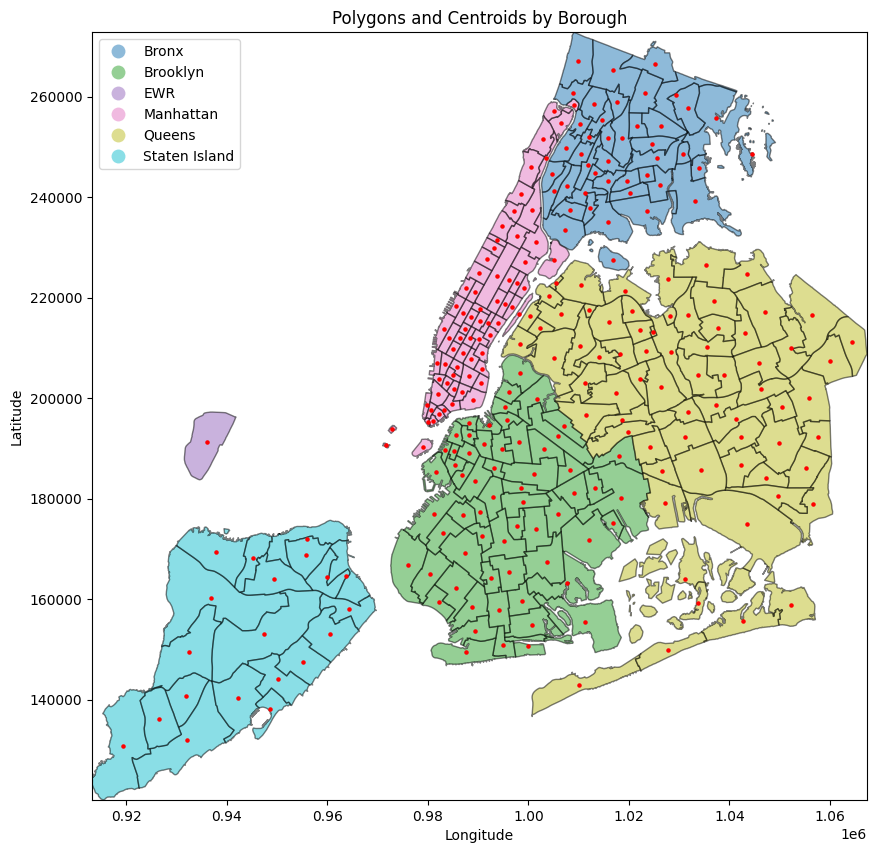

In [8]:
# Assuming NYC_TAXI_ZONES is your GeoDataFrame
# If not, load your GeoDataFrame (uncomment the next line if needed)
# NYC_TAXI_ZONES = gpd.read_file('path_to_your_file.geojson')

# Reproject to a projected CRS (EPSG:2263 for New York)

# Plot the polygons
fig, ax = plt.subplots(figsize=(10, 10))
NYC_TAXI_ZONES.plot(ax=ax, column='borough', legend=True, edgecolor='black', alpha=0.5)

# Plot the centroids
NYC_TAXI_ZONES.set_geometry('centroid').plot(ax=ax, color='red', markersize=5)

# Get the bounds of the geometries to set axis limits
xmin, ymin, xmax, ymax = NYC_TAXI_ZONES.total_bounds

# Set the axis limits
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# Add titles and labels
plt.title('Polygons and Centroids by Borough')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show plot
plt.show()

260
zone
Governor's Island/Ellis Island/Liberty Island    3
Corona                                           2
Newark Airport                                   1
Oakland Gardens                                  1
Park Slope                                       1
Name: count, dtype: int64


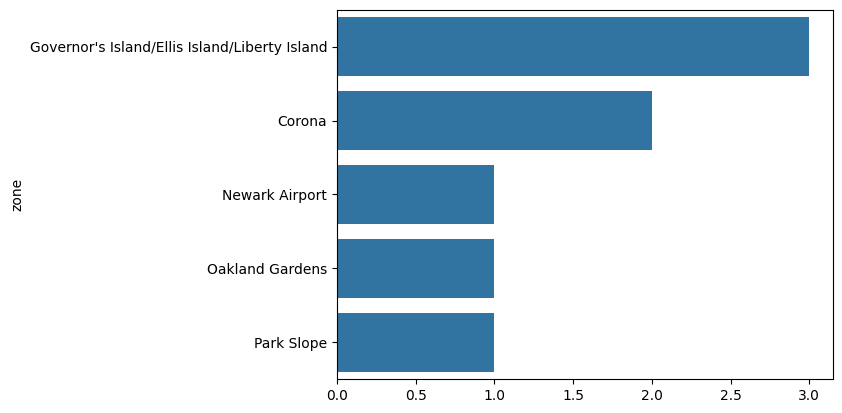

In [9]:
#Zone
print(len(NYC_TAXI_ZONES['zone'].unique()))

top_5 = NYC_TAXI_ZONES['zone'].value_counts().head(5)
print(top_5)
# Se crea un gráfico de barras
ax = sns.barplot(x=top_5.values, y=top_5.index, orient='y')

# Se imprime la gráfica
plt.show()

6
borough
Queens           69
Manhattan        69
Brooklyn         61
Bronx            43
Staten Island    20
EWR               1
Name: count, dtype: int64


/var/folders/0p/l9p40s5527102cq821lz6jlw0000gn/T/ipykernel_67373/1187439654.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


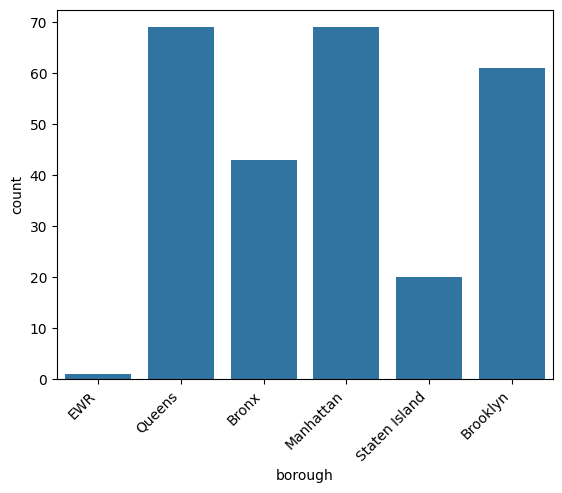

In [10]:
#Variables categoricas
#Borough
print(len(NYC_TAXI_ZONES['borough'].unique()))
print(NYC_TAXI_ZONES['borough'].value_counts())
ax = sns.countplot(x="borough", data=NYC_TAXI_ZONES)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

    Charging Stations

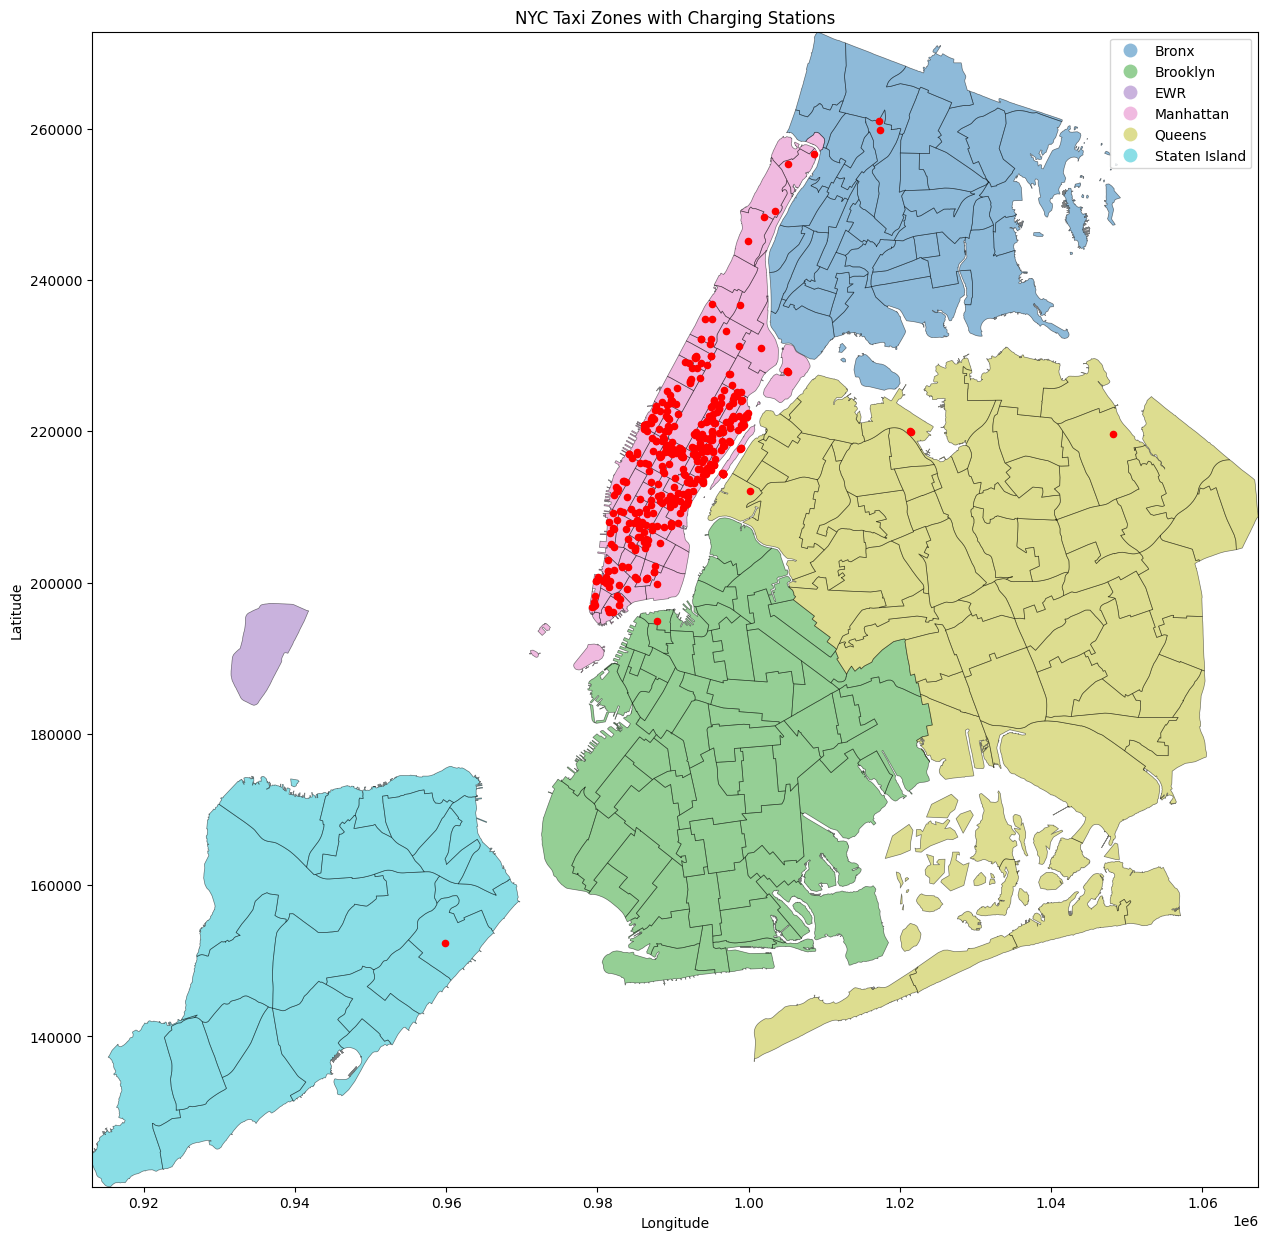

In [11]:
# Plotting setup
fig, ax = plt.subplots(figsize=(25, 15))

# Plot NYC taxi zones polygons
NYC_TAXI_ZONES.plot(ax=ax, column='borough', legend=True, alpha=0.5, edgecolor='black', linewidth=0.5)

# Plot charging stations points
# Check and match CRS if necessary

charging_stations.plot(ax=ax, marker='o', color='red', markersize=20)

# Calculate the total extent of NYC_TAXI_ZONES
xmin, ymin, xmax, ymax = NYC_TAXI_ZONES.total_bounds

# Set the axis limits
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# Set plot title and labels
ax.set_title('NYC Taxi Zones with Charging Stations')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Display plot
plt.show()



352
Street Address
11 E Loop Rd                   8
10 Riverside Blvd              7
10 Central Rd                  3
225 W 49th St                  3
2 Washington Square Village    2
                              ..
32 Debrosses St                1
318-322  E 23rd St             1
311 W Broadway                 1
310 Park Ave                   1
107 Essx St                    1
Name: count, Length: 352, dtype: int64


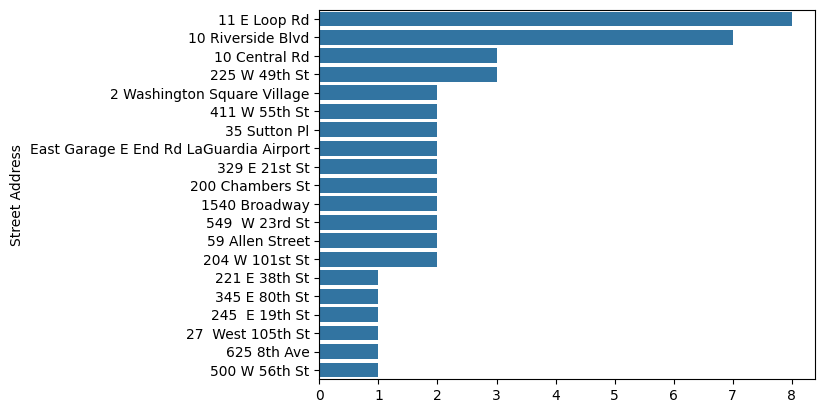

In [12]:

print(len(charging_stations['Street Address'].unique()))
print(charging_stations['Street Address'].value_counts())
top_5 = charging_stations['Street Address'].value_counts().head(20)
# Se crea un gráfico de barras
ax = sns.barplot(x=top_5.values, y=top_5.index, orient='y')

# Se imprime la gráfica
plt.show()

    Yellowtrip data

In [13]:
Yellow_Trip_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 6 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   trip_distance          float64       
 4   PULocationID           int64         
 5   DOLocationID           int64         
dtypes: datetime64[us](2), float64(1), int64(3)
memory usage: 140.4 MB


categoricas

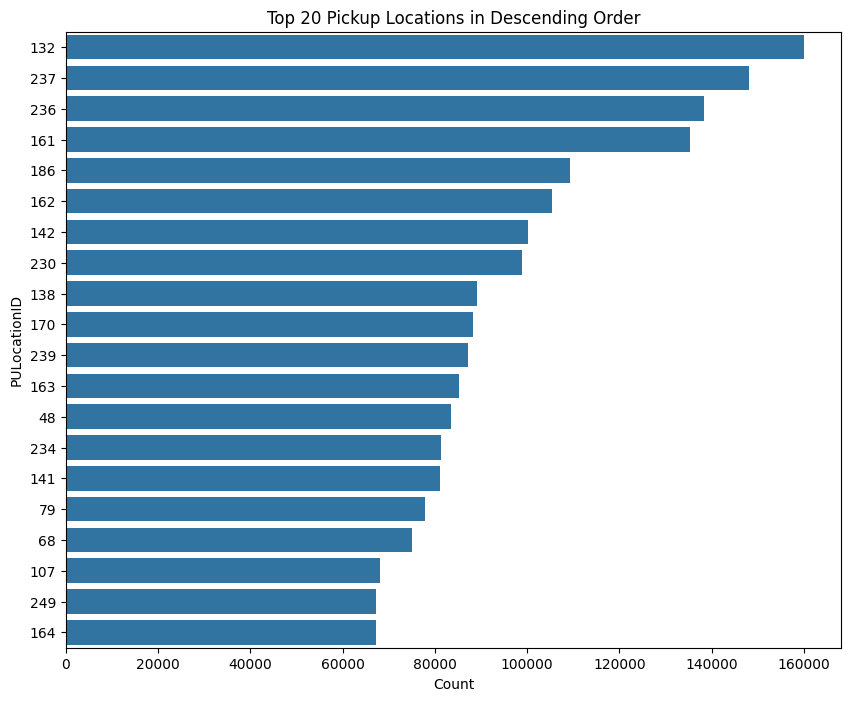

In [14]:
# Calculate the value counts
location_counts = Yellow_Trip_Data['PULocationID'].value_counts()

# Select top 20 locations
top_20 = location_counts.head(20)

# Sort values by count in descending order
top_20_sorted = top_20.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=top_20_sorted.values, y=top_20_sorted.index, orient='h', order=top_20_sorted.index)

# Set plot labels and title
ax.set_xlabel('Count')
ax.set_ylabel('PULocationID')
ax.set_title('Top 20 Pickup Locations in Descending Order')

# Display plot
plt.show()



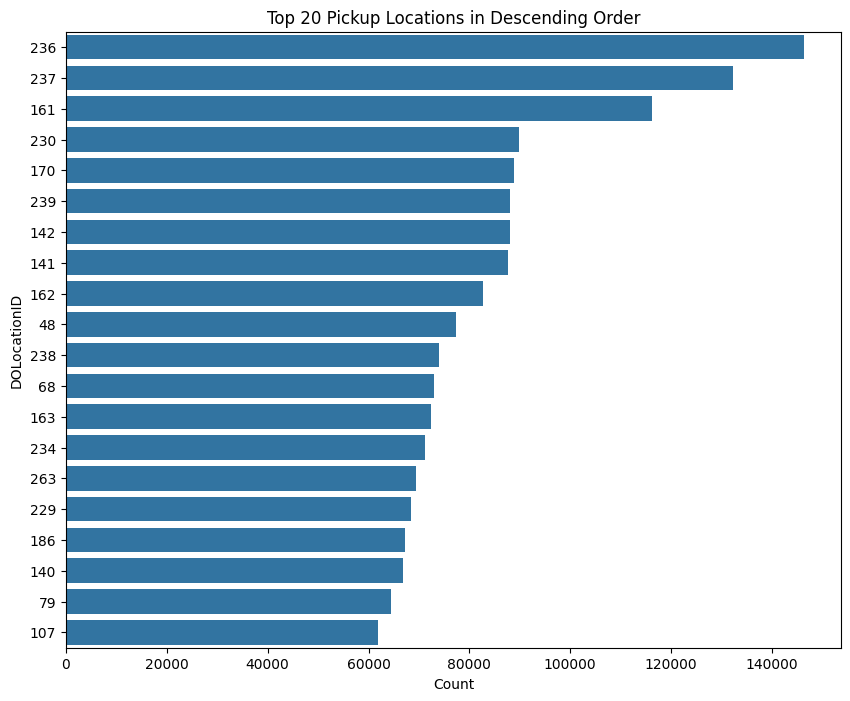

In [15]:

# Calculate the value counts
location_counts = Yellow_Trip_Data['DOLocationID'].value_counts()

# Select top 20 locations
top_20 = location_counts.head(20)

# Sort values by count in descending order
top_20_sorted = top_20.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=top_20_sorted.values, y=top_20_sorted.index, orient='h', order=top_20_sorted.index)

# Set plot labels and title
ax.set_xlabel('Count')
ax.set_ylabel('DOLocationID')
ax.set_title('Top 20 Pickup Locations in Descending Order')

# Display plot
plt.show()

Ingienería de variables

In [16]:
Yellow_Trip_Data['PULocationID'] = Yellow_Trip_Data['PULocationID'].astype(str)
NYC_TAXI_ZONES['location_id'] = NYC_TAXI_ZONES['location_id'].astype(str)

Yellow_Trip_location = pd.merge(Yellow_Trip_Data, NYC_TAXI_ZONES, left_on='PULocationID', right_on='location_id')

# Print information about the merged DataFrame
print(Yellow_Trip_location.info())

# Rename columns
Yellow_Trip_location.rename(columns={
    'zone': 'PULzone',
    'borough': 'PULborough',
    'geometry': 'PULgeometry',
    'centroid': 'PULcentroid',
    'Centroid': 'PULCentroid'
}, inplace=True)

# Drop the column
Yellow_Trip_location.drop(columns='PULCentroid', inplace=True)

/var/folders/0p/l9p40s5527102cq821lz6jlw0000gn/T/ipykernel_67373/747979818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Yellow_Trip_Data['PULocationID'] = Yellow_Trip_Data['PULocationID'].astype(str)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3025288 entries, 0 to 3025287
Data columns (total 12 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   trip_distance          float64       
 4   PULocationID           object        
 5   DOLocationID           int64         
 6   location_id            object        
 7   zone                   object        
 8   borough                object        
 9   geometry               geometry      
 10  centroid               geometry      
 11  Centroid               geometry      
dtypes: datetime64[us](2), float64(1), geometry(3), int64(2), object(4)
memory usage: 277.0+ MB
None


In [17]:
Yellow_Trip_location.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,location_id,PULzone,PULborough,PULgeometry,PULcentroid
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,0.97,161,141,161,Midtown Center,Manhattan,"MULTIPOLYGON (((991081.026 214453.698, 990952....",POINT (990428.526 215447.527)
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.10,43,237,43,Central Park,Manhattan,"MULTIPOLYGON (((991852.973 217950.807, 991725....",POINT (993789.01 224356.212)
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,2.51,48,238,48,Clinton East,Manhattan,"MULTIPOLYGON (((986694.313 214463.846, 986568....",POINT (987063.186 216986.07)
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,1.90,138,7,138,LaGuardia Airport,Queens,"MULTIPOLYGON (((1019904.219 225677.983, 102031...",POINT (1019251.307 221428.045)
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.43,107,79,107,Gramercy,Manhattan,"MULTIPOLYGON (((989131.643 205749.904, 989084....",POINT (988669.591 207721.846)


In [18]:
# Convert DOLocationID in Yellow_Trip_location to string to match the type in NYC_TAXI_ZONES
Yellow_Trip_location['DOLocationID'] = Yellow_Trip_location['DOLocationID'].astype(str)

# Merge the DataFrames
Yellow_Trip_location = pd.merge(Yellow_Trip_location, NYC_TAXI_ZONES, left_on='DOLocationID', right_on='location_id')

# Print information about the merged DataFrame
print(Yellow_Trip_location.info())

# Rename columns
Yellow_Trip_location.rename(columns={
    'zone': 'DOLzone',
    'borough': 'DOLborough',
    'geometry': 'DOLgeometry',
    'centroid': 'DOLcentroid',
    'Centroid': 'DOLCentroid'
}, inplace=True)

# Drop the column
Yellow_Trip_location.drop(columns='DOLCentroid', inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3009657 entries, 0 to 3009656
Data columns (total 17 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   trip_distance          float64       
 4   PULocationID           object        
 5   DOLocationID           object        
 6   location_id_x          object        
 7   PULzone                object        
 8   PULborough             object        
 9   PULgeometry            geometry      
 10  PULcentroid            geometry      
 11  location_id_y          object        
 12  zone                   object        
 13  borough                object        
 14  geometry               geometry      
 15  centroid               geometry      
 16  Centroid               geometry      
dtypes: datetime64[us](2), float64(1), geometry(5), int64(1), object(8

In [19]:
Yellow_Trip_location.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,location_id_x,PULzone,PULborough,PULgeometry,PULcentroid,location_id_y,DOLzone,DOLborough,DOLgeometry,DOLcentroid
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,0.97,161,141,161,Midtown Center,Manhattan,"MULTIPOLYGON (((991081.026 214453.698, 990952....",POINT (990428.526 215447.527),141,Lenox Hill West,Manhattan,"MULTIPOLYGON (((994839.073 216123.698, 994786....",POINT (995431.198 218699.193)
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.10,43,237,43,Central Park,Manhattan,"MULTIPOLYGON (((991852.973 217950.807, 991725....",POINT (993789.01 224356.212),237,Upper East Side South,Manhattan,"MULTIPOLYGON (((993633.442 216961.016, 993507....",POINT (993769.024 219305.828)
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,2.51,48,238,48,Clinton East,Manhattan,"MULTIPOLYGON (((986694.313 214463.846, 986568....",POINT (987063.186 216986.07),238,Upper West Side North,Manhattan,"MULTIPOLYGON (((992877.88 225627.534, 992741.7...",POINT (991712.764 227717.518)
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,1.90,138,7,138,LaGuardia Airport,Queens,"MULTIPOLYGON (((1019904.219 225677.983, 102031...",POINT (1019251.307 221428.045),7,Astoria,Queens,"MULTIPOLYGON (((1010804.218 218919.641, 101104...",POINT (1006496.679 216719.218)
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.43,107,79,107,Gramercy,Manhattan,"MULTIPOLYGON (((989131.643 205749.904, 989084....",POINT (988669.591 207721.846),79,East Village,Manhattan,"MULTIPOLYGON (((988746.067 202151.955, 988733....",POINT (988147.658 204368.502)


In [20]:
# Assuming 'trips_data' is your DataFrame containing trip information
starting_trips = Yellow_Trip_location.groupby('PULzone').size()
ending_trips = Yellow_Trip_location.groupby('DOLzone').size()
print(starting_trips)


PULzone
Allerton/Pelham Gardens       39
Alphabet City               3639
Arden Heights                 55
Arrochar/Fort Wadsworth       48
Astoria                     1505
                           ...  
Woodlawn/Wakefield            73
Woodside                     636
World Trade Center         12791
Yorkville East             43654
Yorkville West             65957
Length: 254, dtype: int64


In [21]:
# Assuming 'trips_data' has a 'pickup_datetime' column
Yellow_Trip_location['pickup_datetime'] = pd.to_datetime(Yellow_Trip_location['tpep_pickup_datetime'])
peak_times = Yellow_Trip_location['pickup_datetime'].dt.hour.value_counts()
print(peak_times)


pickup_datetime
18    212386
17    205849
15    192827
16    192452
19    189231
14    187746
13    175410
12    166912
20    162549
21    158261
11    151238
22    144457
10    140871
9     128719
8     115041
23    112121
7      85392
0      83281
1      58745
6      42920
2      41351
3      26878
5      17588
4      17432
Name: count, dtype: int64


In [22]:
Yellow_Trip_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3009657 entries, 0 to 3009656
Data columns (total 17 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   trip_distance          float64       
 4   PULocationID           object        
 5   DOLocationID           object        
 6   location_id_x          object        
 7   PULzone                object        
 8   PULborough             object        
 9   PULgeometry            geometry      
 10  PULcentroid            geometry      
 11  location_id_y          object        
 12  DOLzone                object        
 13  DOLborough             object        
 14  DOLgeometry            geometry      
 15  DOLcentroid            geometry      
 16  pickup_datetime        datetime64[us]
dtypes: datetime64[us](3), float64(1), geometry(4), int64(1), object(8

In [23]:
from geopy.distance import distance
from shapely.geometry import Point
from pyproj import Transformer

# Define transformer to convert from EPSG:2263 to EPSG:4326 (WGS 84)
transformer = Transformer.from_crs("epsg:2263", "epsg:4326", always_xy=True)

# Convert the coordinates to WGS 84
Yellow_Trip_location['PULcentroid_wgs'] = Yellow_Trip_location['PULcentroid'].apply(lambda point: transformer.transform(point.x, point.y))
Yellow_Trip_location['DOLcentroid_wgs'] = Yellow_Trip_location['DOLcentroid'].apply(lambda point: transformer.transform(point.x, point.y))

# Calculate trip duration in minutes
Yellow_Trip_location['trip_duration'] = (Yellow_Trip_location['tpep_dropoff_datetime'] - Yellow_Trip_location['tpep_pickup_datetime']).dt.total_seconds() / 60.0

# Calculate trip distance using geopy.distance
Yellow_Trip_location['trip_distance'] = Yellow_Trip_location.apply(
    lambda row: distance(row['PULcentroid_wgs'][::-1], row['DOLcentroid_wgs'][::-1]).miles,
    axis=1
)

print(Yellow_Trip_location.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3009657 entries, 0 to 3009656
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   trip_distance          float64       
 4   PULocationID           object        
 5   DOLocationID           object        
 6   location_id_x          object        
 7   PULzone                object        
 8   PULborough             object        
 9   PULgeometry            geometry      
 10  PULcentroid            geometry      
 11  location_id_y          object        
 12  DOLzone                object        
 13  DOLborough             object        
 14  DOLgeometry            geometry      
 15  DOLcentroid            geometry      
 16  pickup_datetime        datetime64[us]
 17  PULcentroid_wgs        object        
 18  DOLcentroid_wgs       

In [24]:
from sklearn.neighbors import BallTree
import numpy as np

# Assuming 'charging_stations' is a GeoDataFrame with charging station locations
charging_stations_geometry = charging_stations['geometry'].apply(lambda x: (x.x, x.y)).tolist()
tree = BallTree(np.array(charging_stations_geometry), leaf_size=15)

def nearest_charging_station_distance(point):
    point_coords = (point.x, point.y)
    dist, idx = tree.query([point_coords], k=1)
    return dist[0][0]

# Calculate nearest charging station distance for each trip starting point
Yellow_Trip_location['nearest_charging_distance'] = Yellow_Trip_location['DOLcentroid'].apply(nearest_charging_station_distance)

print(Yellow_Trip_location.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3009657 entries, 0 to 3009656
Data columns (total 21 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   VendorID                   int64         
 1   tpep_pickup_datetime       datetime64[us]
 2   tpep_dropoff_datetime      datetime64[us]
 3   trip_distance              float64       
 4   PULocationID               object        
 5   DOLocationID               object        
 6   location_id_x              object        
 7   PULzone                    object        
 8   PULborough                 object        
 9   PULgeometry                geometry      
 10  PULcentroid                geometry      
 11  location_id_y              object        
 12  DOLzone                    object        
 13  DOLborough                 object        
 14  DOLgeometry                geometry      
 15  DOLcentroid                geometry      
 16  pickup_datetime            datetime6

In [25]:
def count_charging_stations_within_radius(point, radius):
    point_coords = (point.x, point.y)
    count = tree.query_radius([point_coords], r=radius, count_only=True)
    return count[0]

# Calculate number of charging stations within 1 mile for each trip starting point
Yellow_Trip_location['charging_stations_within_1mile'] = Yellow_Trip_location['PULcentroid'].apply(lambda point: count_charging_stations_within_radius(point, radius=1))

print(Yellow_Trip_location.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  trip_distance  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36       1.130040   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27       0.956526   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49       2.215053   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25       2.575032   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19       0.642753   

  PULocationID DOLocationID location_id_x            PULzone PULborough  \
0          161          141           161     Midtown Center  Manhattan   
1           43          237            43       Central Park  Manhattan   
2           48          238            48       Clinton East  Manhattan   
3          138            7           138  LaGuardia Airport     Queens   
4          107           79           107           Gramercy  Manhattan   

                                         PULgeometry  ...  \
0  MULTIPOLYGON (((991081.026 214453.698, 990952.

In [26]:
Yellow_Trip_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3009657 entries, 0 to 3009656
Data columns (total 22 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   VendorID                        int64         
 1   tpep_pickup_datetime            datetime64[us]
 2   tpep_dropoff_datetime           datetime64[us]
 3   trip_distance                   float64       
 4   PULocationID                    object        
 5   DOLocationID                    object        
 6   location_id_x                   object        
 7   PULzone                         object        
 8   PULborough                      object        
 9   PULgeometry                     geometry      
 10  PULcentroid                     geometry      
 11  location_id_y                   object        
 12  DOLzone                         object        
 13  DOLborough                      object        
 14  DOLgeometry                     geometry      
 15

In [27]:
# Calculate trip duration in minutes
Yellow_Trip_location['trip_duration_minutes'] = (Yellow_Trip_location['tpep_dropoff_datetime'] - Yellow_Trip_location['tpep_pickup_datetime']).dt.total_seconds() / 60.0

# Count number of trips starting/ending in each location
trips_start_count = Yellow_Trip_location['PULocationID'].value_counts().rename('trips_start_count')
trips_end_count = Yellow_Trip_location['DOLocationID'].value_counts().rename('trips_end_count')

# Merge trip count features back into the main dataframe
Yellow_Trip_location = Yellow_Trip_location.merge(trips_start_count, left_on='PULocationID', right_index=True, how='left')
Yellow_Trip_location = Yellow_Trip_location.merge(trips_end_count, left_on='DOLocationID', right_index=True, how='left')

# Calculate average trip distance
Yellow_Trip_location['avg_trip_distance'] = Yellow_Trip_location['trip_distance'] / (Yellow_Trip_location['trips_start_count'] + Yellow_Trip_location['trips_end_count'])

# Perform spatial operations if using GeoPandas for geometry analysis (not detailed here due to complexity)
# Example: Calculate nearest charging station distance or other spatial features


In [28]:
# Prepare features for machine learning models
features = ['trip_duration_minutes', 'avg_trip_distance', 'nearest_charging_distance', 'charging_stations_within_1mile']
X = Yellow_Trip_location[features]

# Optionally scale numerical features if necessary (already shown in previous responses using StandardScaler)


In [29]:
df_Modelo=Yellow_Trip_location[['PULzone','PULborough','DOLzone','DOLborough','trip_duration','nearest_charging_distance','charging_stations_within_1mile','trip_distance']]
df_Modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3009657 entries, 0 to 3009656
Data columns (total 8 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   PULzone                         object 
 1   PULborough                      object 
 2   DOLzone                         object 
 3   DOLborough                      object 
 4   trip_duration                   float64
 5   nearest_charging_distance       float64
 6   charging_stations_within_1mile  int64  
 7   trip_distance                   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 183.7+ MB


In [30]:
def frequency_encode_column(df, column):
    freq_dict = df[column].value_counts(normalize=True).to_dict()
    df[f'{column}_freq'] = df[column].map(freq_dict)
    return df, freq_dict

# Apply frequency encoding to each categorical column
encoded_columns = []
frequency_dicts = {}

for column in ['PULzone', 'DOLzone', 'PULborough', 'DOLborough']:  # List all columns you want to encode
    df_Modelo, freq_dict = frequency_encode_column(df_Modelo, column)
    encoded_columns.append(f'{column}_freq')
    frequency_dicts[column] = freq_dict

print(df_Modelo)

/var/folders/0p/l9p40s5527102cq821lz6jlw0000gn/T/ipykernel_67373/1281740781.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{column}_freq'] = df[column].map(freq_dict)
/var/folders/0p/l9p40s5527102cq821lz6jlw0000gn/T/ipykernel_67373/1281740781.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{column}_freq'] = df[column].map(freq_dict)


                           PULzone PULborough                DOLzone  \
0                   Midtown Center  Manhattan        Lenox Hill West   
1                     Central Park  Manhattan  Upper East Side South   
2                     Clinton East  Manhattan  Upper West Side North   
3                LaGuardia Airport     Queens                Astoria   
4                         Gramercy  Manhattan           East Village   
...                            ...        ...                    ...   
3009652                   Gramercy  Manhattan           Clinton East   
3009653                 Greenpoint   Brooklyn      East Harlem South   
3009654    Greenwich Village South  Manhattan  Upper West Side South   
3009655  Times Sq/Theatre District  Manhattan           East Village   
3009656             Yorkville East  Manhattan    Lincoln Square West   

        DOLborough  trip_duration  nearest_charging_distance  \
0        Manhattan       8.433333                 356.003365   
1      

/var/folders/0p/l9p40s5527102cq821lz6jlw0000gn/T/ipykernel_67373/1281740781.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{column}_freq'] = df[column].map(freq_dict)
/var/folders/0p/l9p40s5527102cq821lz6jlw0000gn/T/ipykernel_67373/1281740781.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{column}_freq'] = df[column].map(freq_dict)


In [31]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Select numerical columns for scaling
numerical_cols = ['nearest_charging_distance', 'charging_stations_within_1mile', 'trip_distance']

# Scale numerical columns
df_Modelo[numerical_cols] = scaler.fit_transform(df_Modelo[numerical_cols])


/var/folders/0p/l9p40s5527102cq821lz6jlw0000gn/T/ipykernel_67373/3893084104.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Modelo[numerical_cols] = scaler.fit_transform(df_Modelo[numerical_cols])


In [32]:
import pandas as pd

# Assuming df_Modelo is your preprocessed DataFrame with scaled features
weights = {
    'nearest_charging_distance': 0.4,
    'charging_stations_within_1mile': 0.3,
    'trip_distance': 0.3
}

# Calculate charging_station_need_score
df_Modelo['charging_station_need_score'] = (
    weights['nearest_charging_distance'] * df_Modelo['nearest_charging_distance'] +
    weights['charging_stations_within_1mile'] * df_Modelo['charging_stations_within_1mile'] +
    weights['trip_distance'] * df_Modelo['trip_distance']
)

# Optionally normalize the score if needed
# df_Modelo['charging_station_need_score'] = normalize_function(df_Modelo['charging_station_need_score'])

# Print a few rows to verify
print(df_Modelo[['charging_station_need_score']].head())

# Save or use this score for further analysis and modeling


   charging_station_need_score
0                    -0.244008
1                    -0.266705
2                    -0.088130
3                     0.344828
4                    -0.267905


/var/folders/0p/l9p40s5527102cq821lz6jlw0000gn/T/ipykernel_67373/2935824786.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Modelo['charging_station_need_score'] = (


<Axes: xlabel='charging_station_need_score', ylabel='Count'>

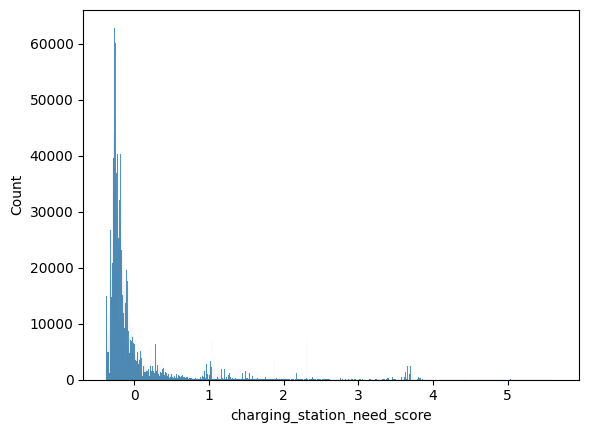

In [33]:
sns.histplot(df_Modelo['charging_station_need_score'])

In [34]:
df_Modelo['charging_station_need_score'].describe()

count    3.009657e+06
mean    -6.994804e-17
std      5.932754e-01
min     -3.835041e-01
25%     -2.641951e-01
50%     -1.938676e-01
75%     -4.821461e-02
max      5.654401e+00
Name: charging_station_need_score, dtype: float64

In [35]:

# Assuming df_Modelo is your DataFrame containing the scores
# Identify top 10 areas with highest need scores
top_areas = df_Modelo.nlargest(10, 'charging_station_need_score')

# Display the top 10 areas
print(top_areas[['charging_station_need_score', 'PULzone_freq', 'DOLzone_freq']])


         charging_station_need_score  PULzone_freq  DOLzone_freq
2170651                     5.654401      0.000009      0.000089
1144524                     5.627806      0.000047      0.000089
1686165                     5.626155      0.000024      0.000095
1957059                     5.626155      0.000024      0.000095
867253                      5.518341      0.000041      0.000174
1556194                     5.518341      0.000041      0.000174
1769808                     5.518341      0.000041      0.000174
2398076                     5.518341      0.000041      0.000174
2470362                     5.518341      0.000041      0.000174
2498963                     5.504869      0.000041      0.000095


In [36]:
NYC_TAXI_ZONES.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   location_id  263 non-null    object  
 1   zone         263 non-null    object  
 2   borough      263 non-null    object  
 3   geometry     263 non-null    geometry
 4   centroid     263 non-null    geometry
 5   Centroid     263 non-null    geometry
dtypes: geometry(3), object(3)
memory usage: 12.5+ KB


In [37]:
# Ensure the zone columns are of the same data type
df_Modelo['PULzone_freq'] = df_Modelo['PULzone_freq'].astype(str)
df_Modelo['DOLzone_freq'] = df_Modelo['DOLzone_freq'].astype(str)
NYC_TAXI_ZONES['zone'] = NYC_TAXI_ZONES['zone'].astype(str)

print(df_Modelo[['PULzone_freq', 'DOLzone_freq']].dtypes)
print(NYC_TAXI_ZONES[['zone']].dtypes)


/var/folders/0p/l9p40s5527102cq821lz6jlw0000gn/T/ipykernel_67373/1738915501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Modelo['PULzone_freq'] = df_Modelo['PULzone_freq'].astype(str)


PULzone_freq    object
DOLzone_freq    object
dtype: object
zone    object
dtype: object


/var/folders/0p/l9p40s5527102cq821lz6jlw0000gn/T/ipykernel_67373/1738915501.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Modelo['DOLzone_freq'] = df_Modelo['DOLzone_freq'].astype(str)


In [38]:
print(df_Modelo.columns)

Index(['PULzone', 'PULborough', 'DOLzone', 'DOLborough', 'trip_duration',
       'nearest_charging_distance', 'charging_stations_within_1mile',
       'trip_distance', 'PULzone_freq', 'DOLzone_freq', 'PULborough_freq',
       'DOLborough_freq', 'charging_station_need_score'],
      dtype='object')


In [39]:
df_Modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3009657 entries, 0 to 3009656
Data columns (total 13 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   PULzone                         object 
 1   PULborough                      object 
 2   DOLzone                         object 
 3   DOLborough                      object 
 4   trip_duration                   float64
 5   nearest_charging_distance       float64
 6   charging_stations_within_1mile  float64
 7   trip_distance                   float64
 8   PULzone_freq                    object 
 9   DOLzone_freq                    object 
 10  PULborough_freq                 float64
 11  DOLborough_freq                 float64
 12  charging_station_need_score     float64
dtypes: float64(7), object(6)
memory usage: 298.5+ MB


In [40]:
merged_Modelo_df = df_Modelo.merge(NYC_TAXI_ZONES.reset_index(), left_on='DOLzone', right_on='zone')

In [41]:
merged_Modelo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3011439 entries, 0 to 3011438
Data columns (total 20 columns):
 #   Column                          Dtype   
---  ------                          -----   
 0   PULzone                         object  
 1   PULborough                      object  
 2   DOLzone                         object  
 3   DOLborough                      object  
 4   trip_duration                   float64 
 5   nearest_charging_distance       float64 
 6   charging_stations_within_1mile  float64 
 7   trip_distance                   float64 
 8   PULzone_freq                    object  
 9   DOLzone_freq                    object  
 10  PULborough_freq                 float64 
 11  DOLborough_freq                 float64 
 12  charging_station_need_score     float64 
 13  index                           int64   
 14  location_id                     object  
 15  zone                            object  
 16  borough                         object  
 17  geometry

In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Extract relevant columns for K-means clustering
X = merged_Modelo_df[['centroid', 'charging_station_need_score']].copy()

# Extract centroid coordinates
X['latitude'] = X['centroid'].apply(lambda point: point.y)
X['longitude'] = X['centroid'].apply(lambda point: point.x)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[['latitude', 'longitude', 'charging_station_need_score']])

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
merged_Modelo_df['kmeans_cluster'] = kmeans.fit_predict(X_scaled)

# Print cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers (Latitude, Longitude, Charging Station Need Score):")
print(cluster_centers)

# Visualize clusters or perform further analysis as needed


Cluster Centers (Latitude, Longitude, Charging Station Need Score):
[[ 2.17173152e+05  9.91084404e+05 -2.05021713e-01]
 [ 1.85408011e+05  1.03830569e+06  2.46169380e+00]
 [ 1.95850812e+05  9.89243930e+05  1.21182032e+00]
 [ 2.26624070e+05  9.98821890e+05  1.14888234e-02]
 [ 2.06270309e+05  9.85671179e+05 -1.53268230e-01]]


In [44]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd
X_dbscan = merged_Modelo_df[['centroid', 'charging_station_need_score']].copy()
X_dbscan['latitude'] = X['centroid'].apply(lambda point: point.y)
X_dbscan['longitude'] = X['centroid'].apply(lambda point: point.x)
# Assuming df_Modelo is your DataFrame
# Extract relevant columns for DBSCAN clustering

# Standardize the features (optional for DBSCAN, depending on the scale of your data)
scaler_dbscan = StandardScaler()
X_dbscan_scaled = scaler_dbscan.fit_transform(X_dbscan)

# Perform DBSCAN clustering
eps = 0.5  # Maximum distance between two samples for them to be considered as in the same neighborhood
min_samples = 10  # Minimum number of samples in a neighborhood for a point to be considered as a core point
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
df_Modelo['dbscan_cluster'] = dbscan.fit_predict(X_dbscan_scaled)

# Print number of clusters formed (-1 indicates outliers)
n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print(f"Number of clusters formed by DBSCAN: {n_clusters}")

# Optionally, you can explore or visualize the clusters further
# For example, to see the distribution of clusters
cluster_counts = df_Modelo['dbscan_cluster'].value_counts()
print("Cluster Counts:")
print(cluster_counts)

# Or visualize the clusters on a map or plot
# Example plotting code:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(df_Modelo['longitude'], df_Modelo['latitude'], c=df_Modelo['dbscan_cluster'], cmap='viridis', s=20)
plt.colorbar(label='Cluster')
plt.title('DBSCAN Clustering of Coordinates with Charging Station Need Score')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


TypeError: float() argument must be a string or a real number, not 'Point'

In [45]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming merged_Modelo_df is your DataFrame
X_dbscan = merged_Modelo_df[['centroid', 'charging_station_need_score']].copy()

# Extract latitude and longitude from centroid
X_dbscan['latitude'] = X_dbscan['centroid'].apply(lambda point: point.y)
X_dbscan['longitude'] = X_dbscan['centroid'].apply(lambda point: point.x)

# Drop 'centroid' column if no longer needed
X_dbscan.drop(columns=['centroid'], inplace=True)

# Standardize the features (optional for DBSCAN, depending on the scale of your data)
scaler_dbscan = StandardScaler()
X_dbscan_scaled = scaler_dbscan.fit_transform(X_dbscan)

# Perform DBSCAN clustering
eps = 0.5  # Maximum distance between two samples for them to be considered as in the same neighborhood
min_samples = 10  # Minimum number of samples in a neighborhood for a point to be considered as a core point
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
merged_Modelo_df['dbscan_cluster'] = dbscan.fit_predict(X_dbscan_scaled)

# Print number of clusters formed (-1 indicates outliers)
n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print(f"Number of clusters formed by DBSCAN: {n_clusters}")

# Optionally, you can explore or visualize the clusters further
# For example, to see the distribution of clusters
cluster_counts = merged_Modelo_df['dbscan_cluster'].value_counts()
print("Cluster Counts:")
print(cluster_counts)

# Visualize the clusters on a map or plot
plt.figure(figsize=(10, 8))
plt.scatter(merged_Modelo_df['longitude'], merged_Modelo_df['latitude'], c=merged_Modelo_df['dbscan_cluster'], cmap='viridis', s=20)
plt.colorbar(label='Cluster')
plt.title('DBSCAN Clustering of Coordinates with Charging Station Need Score')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


: 